In [18]:
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [20]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [21]:
#Describe DataFrame.
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [22]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Show a plot of the total number of responses.
responses_counts = data['Response'].value_counts()

Text(0, 0.5, 'Count')

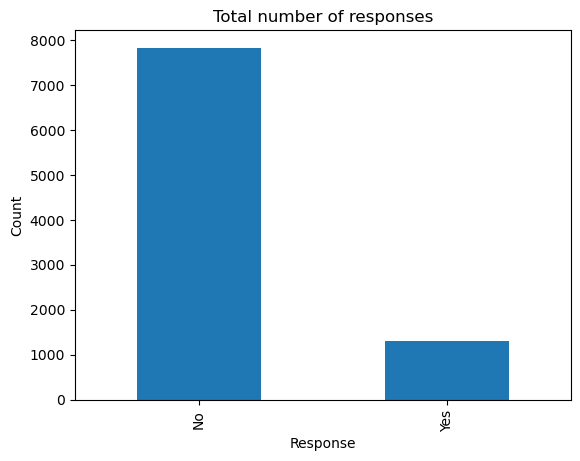

In [25]:
responses_counts.plot(kind='bar')
plt.title('Total number of responses')
plt.xlabel('Response')
plt.ylabel('Count')

In [26]:
#Show a plot of the response rate by the sales channel

data['Sales Channel'].value_counts()


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

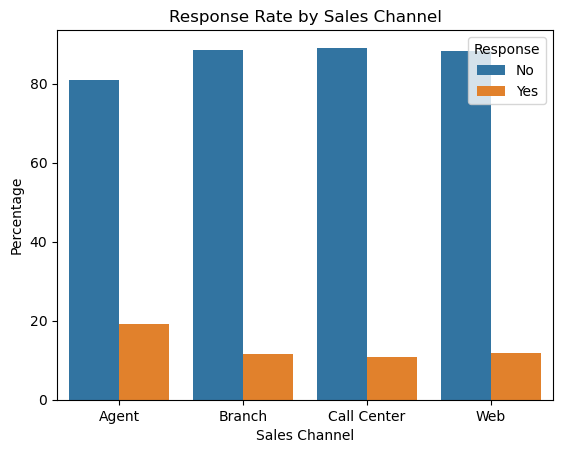

In [29]:
#Show a plot of the response rate by the sales channel

counts = data.groupby(['Sales Channel', 'Response']).size()

percentages = counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

percentages = percentages.reset_index(name='percent')
#we are working with multind. 

sns.barplot(x='Sales Channel', y='percent', hue='Response', data=percentages)
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.show()

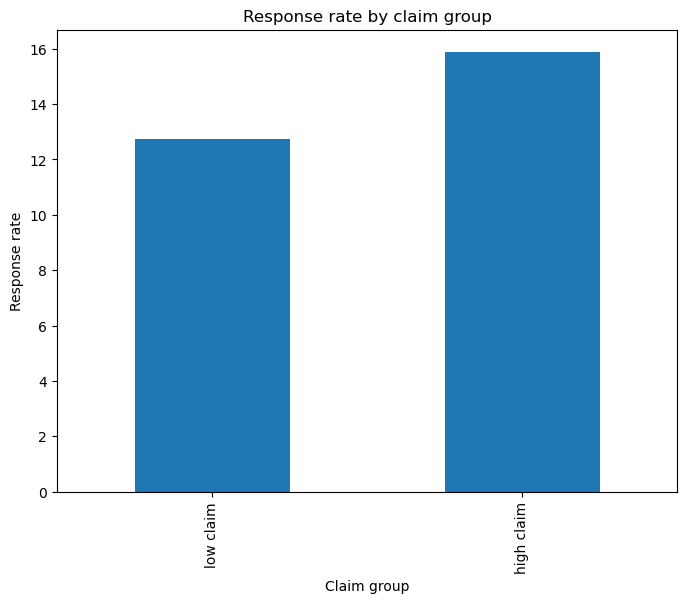

In [45]:
#create income groups 
median_claim =  data['Total Claim Amount'].median()
claim_bins = pd.cut(data['Total Claim Amount'], bins=[0, median_income, float('inf')], labels=['low claim', 'high claim'])

response_rate = data.groupby(claim_bins)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100
                    
plt.figure(figsize=(8, 6))
response_rate.plot(kind='bar')
plt.title('Response rate by claim group')
plt.xlabel('Claim group')
plt.ylabel('Response rate')
plt.show()

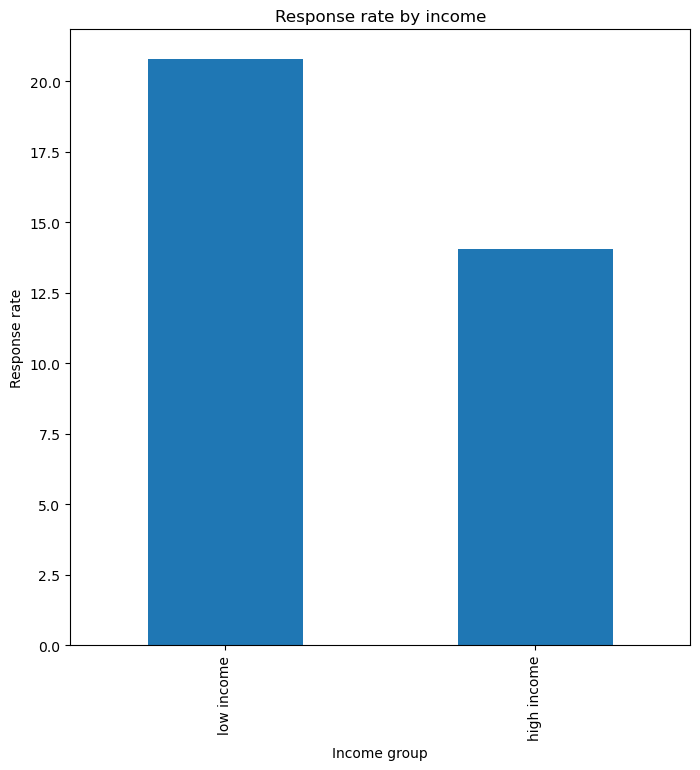

In [49]:
median_income =  data['Income'].median()
income_bins = pd.cut(data['Income'], bins=[0, median_income, float('inf')], labels=['low income', 'high income'])

response_rate = data.groupby(income_bins)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100
                    
plt.figure(figsize=(8, 8))
response_rate.plot(kind='bar')
plt.title('Response rate by income')
plt.xlabel('Income group')
plt.ylabel('Response rate')
plt.show()